In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc



In [2]:

# Load a sample dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features for simplicity
y = (iris.target != 0) * 1  # Convert to binary classification problem (1 if not Iris-setosa, 0 otherwise)



In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [4]:
# Make predictions
y_pred = model.predict(X_test)



In [5]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



Text(0, 0.5, 'Feature 2')

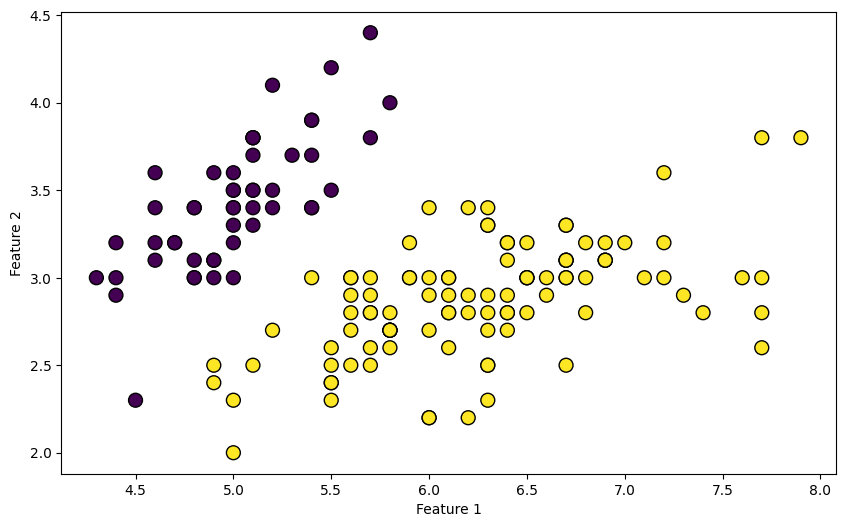

In [6]:
# Visualize the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=100, label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')



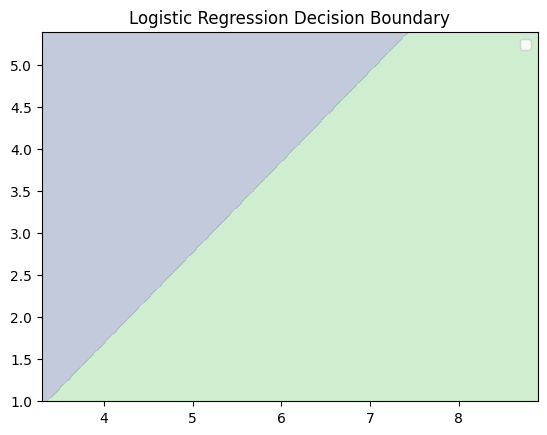

In [7]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis', levels=1)

plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()



In [8]:
# ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)



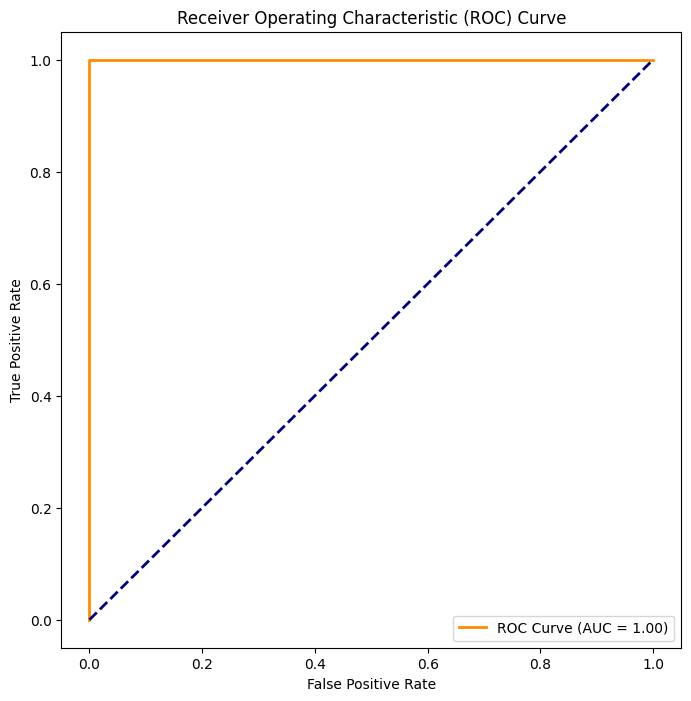

In [9]:
# Visualize ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [10]:

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.00

Confusion Matrix:
 [[10  0]
 [ 0 20]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Model
def logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    X = np.c_[np.ones((m, 1)), X]  # Add a bias term

    # Initialize weights
    weights = np.zeros((n + 1, 1))

    # Gradient Descent
    for epoch in range(epochs):
        # Calculate predictions
        predictions = sigmoid(np.dot(X, weights))

        # Calculate error
        error = y.reshape(-1, 1) - predictions

        # Update weights
        weights += learning_rate * np.dot(X.T, error)

    return weights


# Predict function
def predict(X, weights):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    predictions = sigmoid(np.dot(X, weights))
    return (predictions >= 0.5).astype(int)

# Evaluation Metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    return np.array([[np.sum((y_true == 1) & (y_pred == 1)), np.sum((y_true == 0) & (y_pred == 1))],
                     [np.sum((y_true == 1) & (y_pred == 0)), np.sum((y_true == 0) & (y_pred == 0))]])

# Generate some random data for demonstration
np.random.seed(42)
X = np.random.rand(100, 2) * 5
y = (2 * X[:, 0] + 1.5 * X[:, 1] + np.random.randn(100) > 5).astype(int)

# Train Logistic Regression model
weights = logistic_regression(X, y, learning_rate=0.01, epochs=10000)

# Make predictions
y_pred = predict(X, weights)





In [18]:
# Display evaluation metrics
print(f"Accuracy: {accuracy(y, y_pred):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))



Accuracy: 0.67

Confusion Matrix:
 [[6320 1580]
 [1680  420]]


Text(0, 0.5, 'Feature 2')

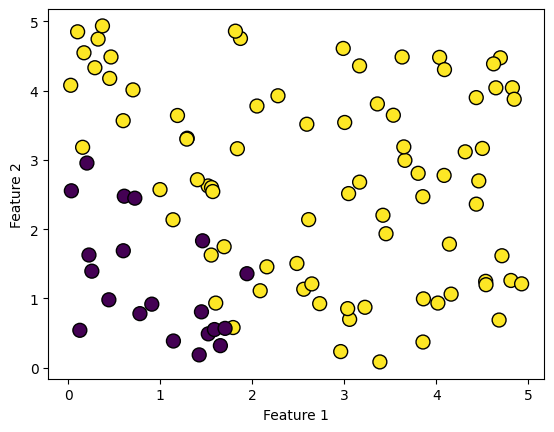

In [19]:
# Visualize the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=100, label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')



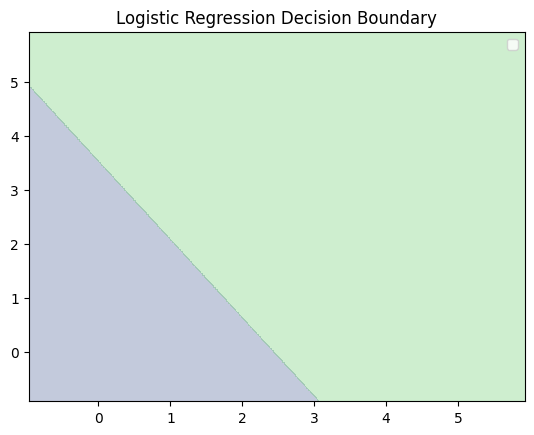

In [20]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = predict(np.c_[xx.ravel(), yy.ravel()], weights)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis', levels=1)

plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()